In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt # https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot

%matplotlib inline

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina") 
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

print(f"{np.__version__}")
print(f"{pd.__version__}")
print(f"{mpl.__version__}")

1.23.5
1.5.3
3.7.1


|pyplot API|Objecte-oriented API|description|
|-|-|-|
|`suptitle`|`suptitle`|title of figure|
|`title`|`set_title`|title of subplot `ax`|
|`xlabel`|`set_xlabel`|x-axis label|
|`ylabel`|`set_ylabel`|y-axis label|
|`figtext`|`text`|figure text|
|`text`|`text`|Axes taext|
|`annoatate`|`annotate`|Axes annotation with arrow|

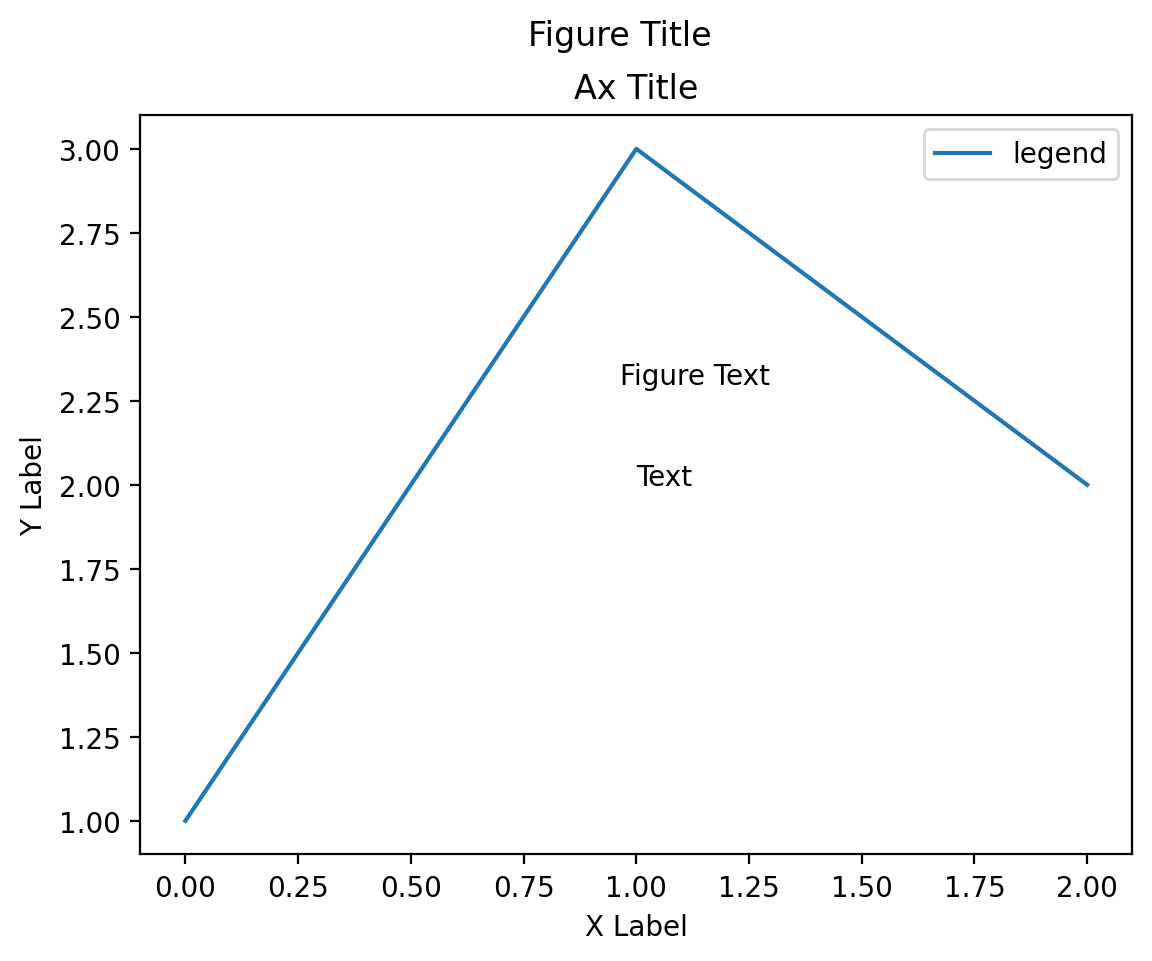

In [7]:
fig, ax = plt.subplots()

fig.suptitle('Figure Title')

ax.plot([1, 3, 2], label='legend') # 선 그래프 그려
ax.legend() # legend 표시해

ax.set_title('Ax Title')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

ax.text(x=1,y=2, s='Text') # 이 좌표에 텍스트 넣어
fig.text(0.5, 0.6, s='Figure Text') # fig 전에 위치에서 (0.5, 0.6) 위치에 넣어

plt.show()


text의 요소들

- `family`
- `size` or `fontsize`
- `style` or `fontstyle`
- `weight` or `fontweight`

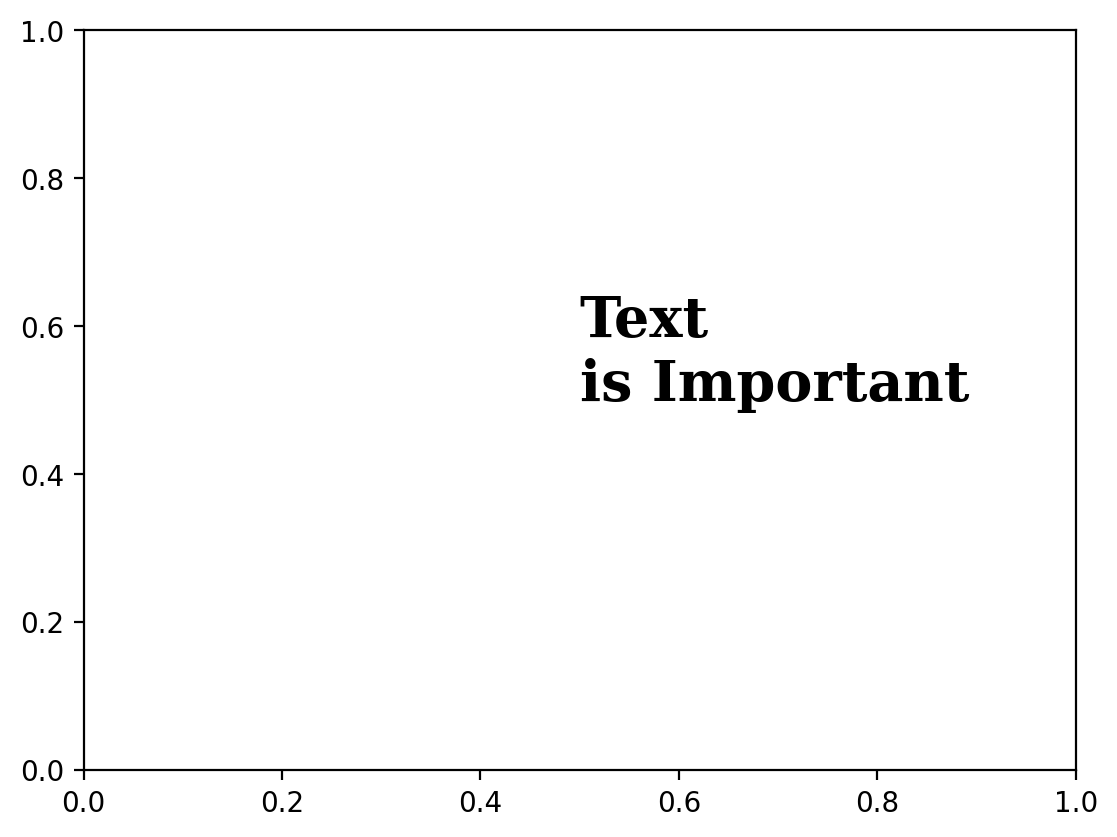

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, 
        s='Text\nis Important',
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
)

plt.show()

기타 text 커스텀 요소들


- `color`
- `linespacing`
- `backgroundcolor`
- `alpha`
- `zorder`
- `visible`

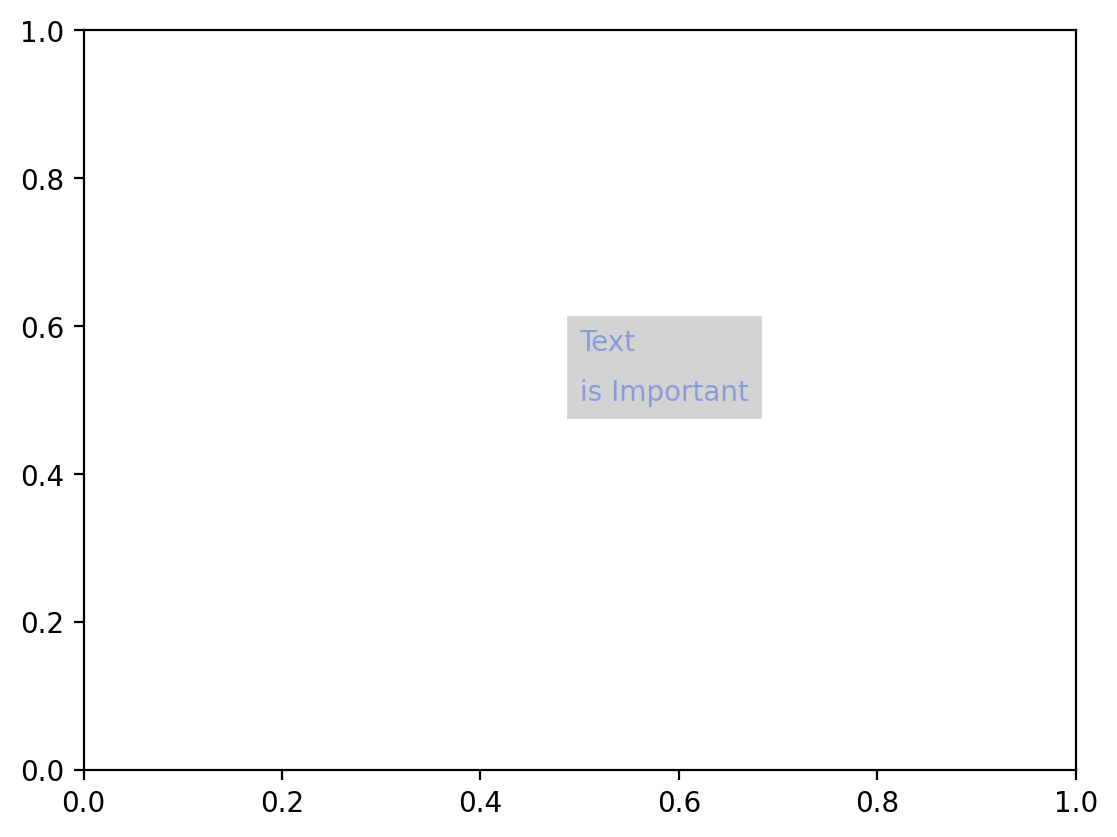

In [12]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        # fontsize=20,
        # fontweight='bold',
        # fontfamily='serif',
        color='royalblue',
        linespacing=2,
        backgroundcolor='lightgray',
        alpha=0.5
)

plt.show()

텍스트 정렬

- `ha` : horizontal alignment
- `va` : vertical alignment
- `rotation`
- `multialignment`

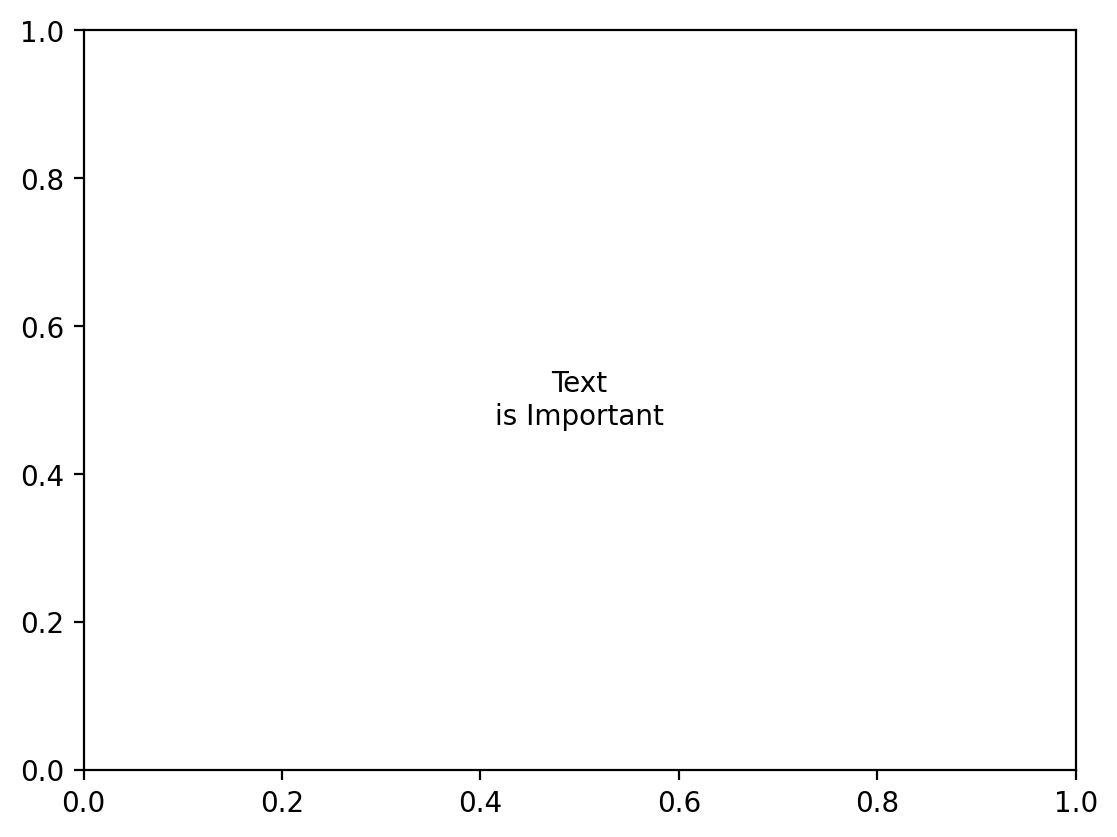

In [14]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        # fontsize=20,
        # fontweight='bold',
        # fontfamily='serif',
        # color='royalblue',
        # linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        rotation='horizontal' # vertical?
)


plt.show()

text에 박스 만들기

- `bbox`
- [Drawing fancy boxes](https://matplotlib.org/stable/gallery/shapes_and_collections/fancybox_demo.html)

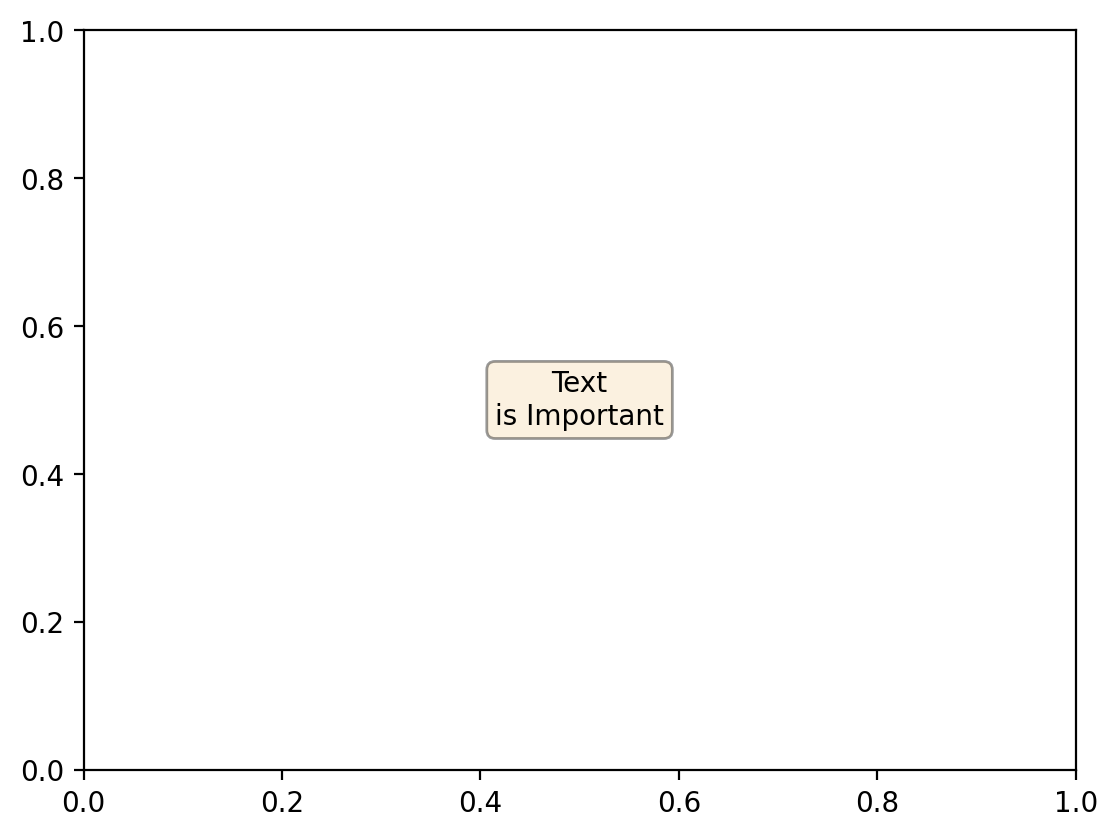

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(x=0.5, y=0.5, s='Text\nis Important',
        # fontsize=20,
        # fontweight='bold',
        # fontfamily='serif',
        # color='black',
        # linespacing=2,
        va='center', # top, bottom, center
        ha='center', # left, right, center
        # rotation='horizontal', # vertical?
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.4)
)

plt.show()

실제 데이터로 그려보자

In [19]:
student = pd.read_csv('../data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


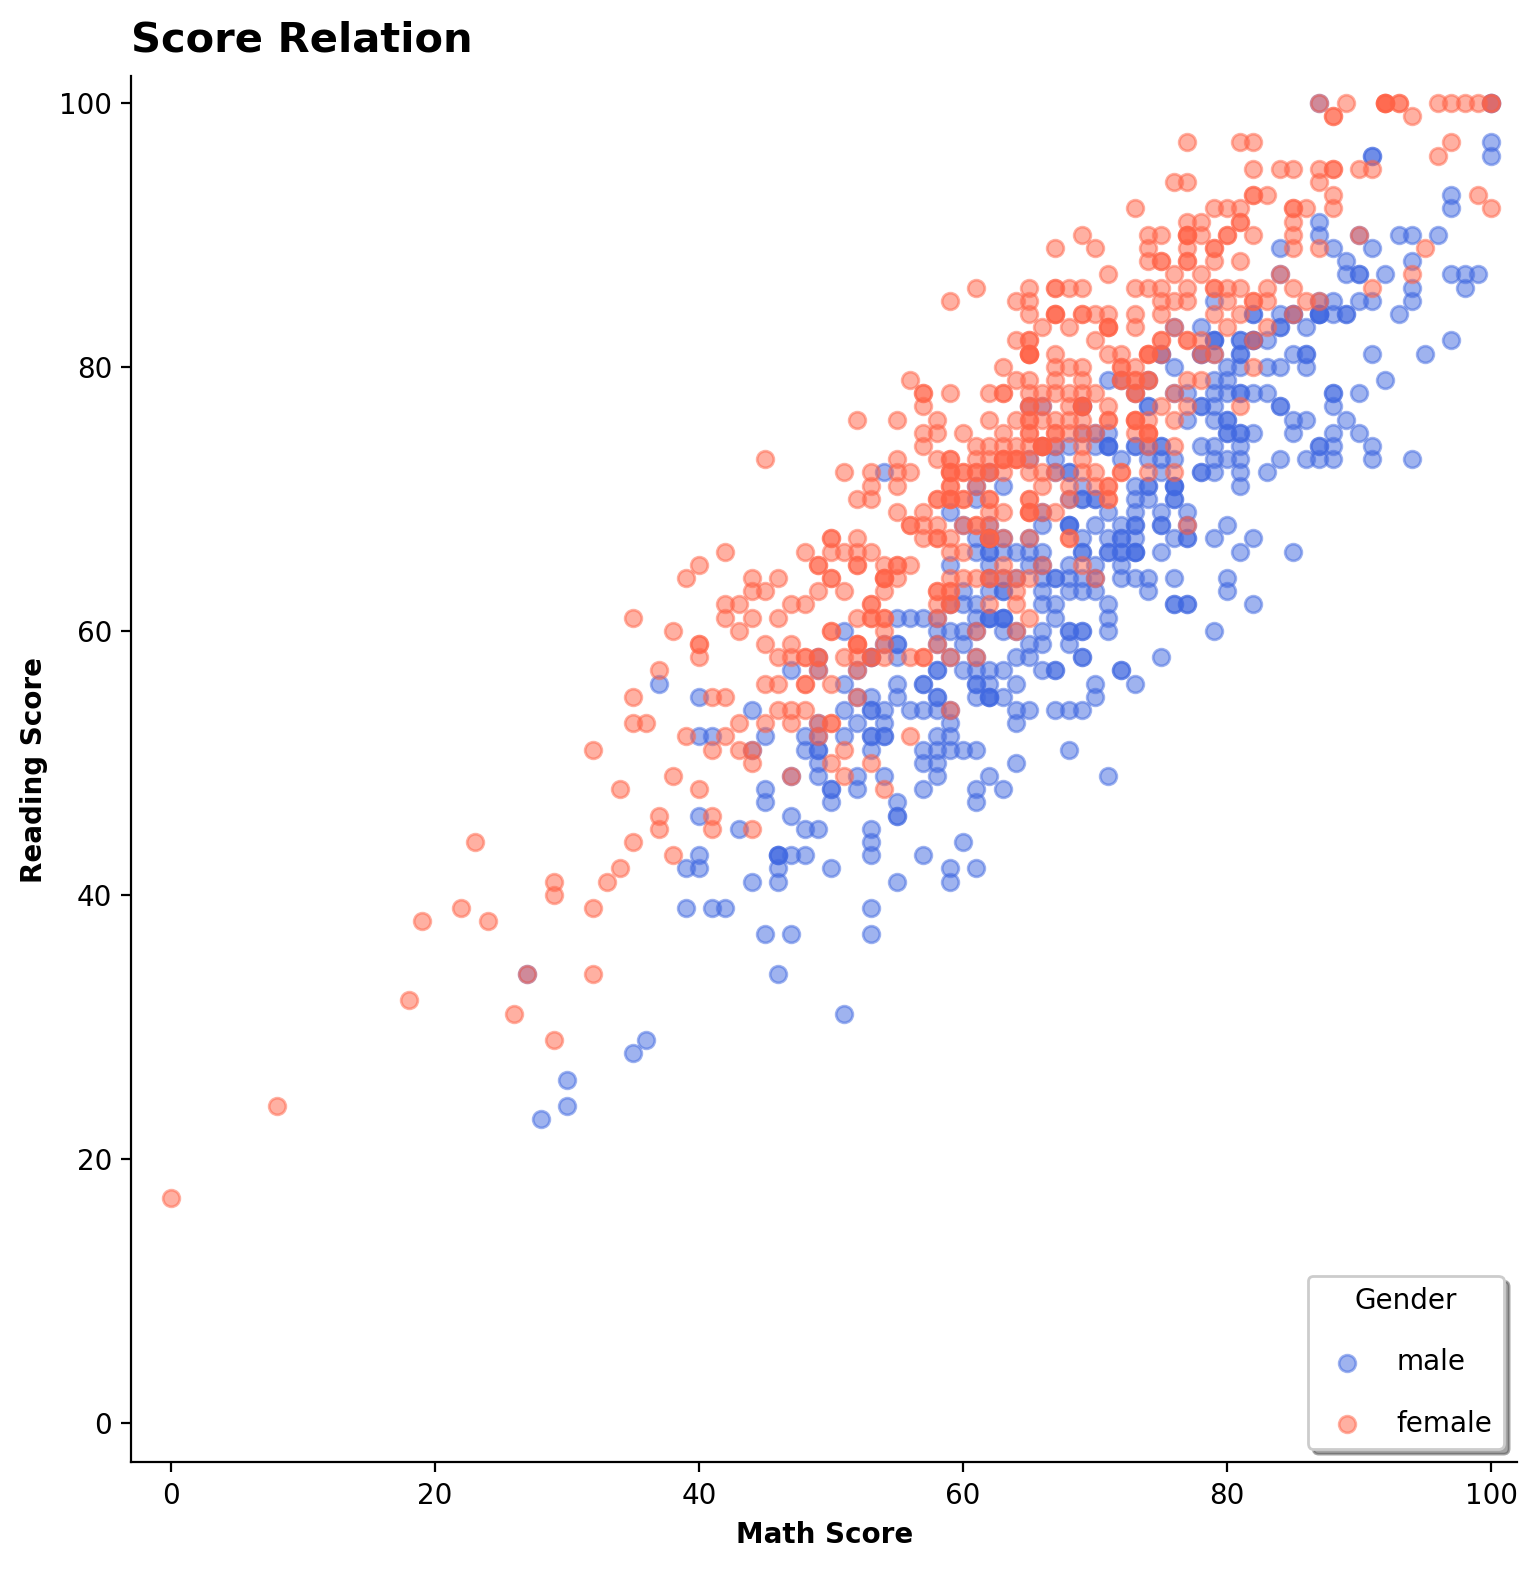

In [29]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

for g, c in zip(['male', 'female'], ['royalblue', 'tomato']):
    student_sub = student[student['gender']==g]
    ax.scatter(x=student_sub ['math score'], y=student_sub ['reading score'],
            c=c,
            alpha=0.5, # 데이터 많으니까 alpha 낮추게
            label=g)

# x, y lim 범위 조정
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

# spine 제거
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score',  fontweight='semibold')
ax.set_ylabel('Reading Score',  fontweight='semibold')

ax.set_title('Score Relation', 
            loc='left', va='bottom',
            fontweight='bold', fontsize=15
            )

ax.legend(
    title='Gender',
    shadow=True,
    labelspacing=1.2,
    loc='lower right' # legend 위치 조정
#     bbox_to_anchor=[1.2, 0.5] # 좀 더 세밀한 legend 위치 조정
)

plt.show()

In [30]:
def score_band(x):
    tmp = (x+9)//10
    if tmp <= 1: 
        return '0 - 10'
    return f'{tmp*10-9} - {tmp*10}'

student['math-range'] = student['math score'].apply(score_band)
student['math-range'].value_counts().sort_index()

0 - 10        2
11 - 20       2
21 - 30      12
31 - 40      34
41 - 50     100
51 - 60     189
61 - 70     270
71 - 80     215
81 - 90     126
91 - 100     50
Name: math-range, dtype: int64

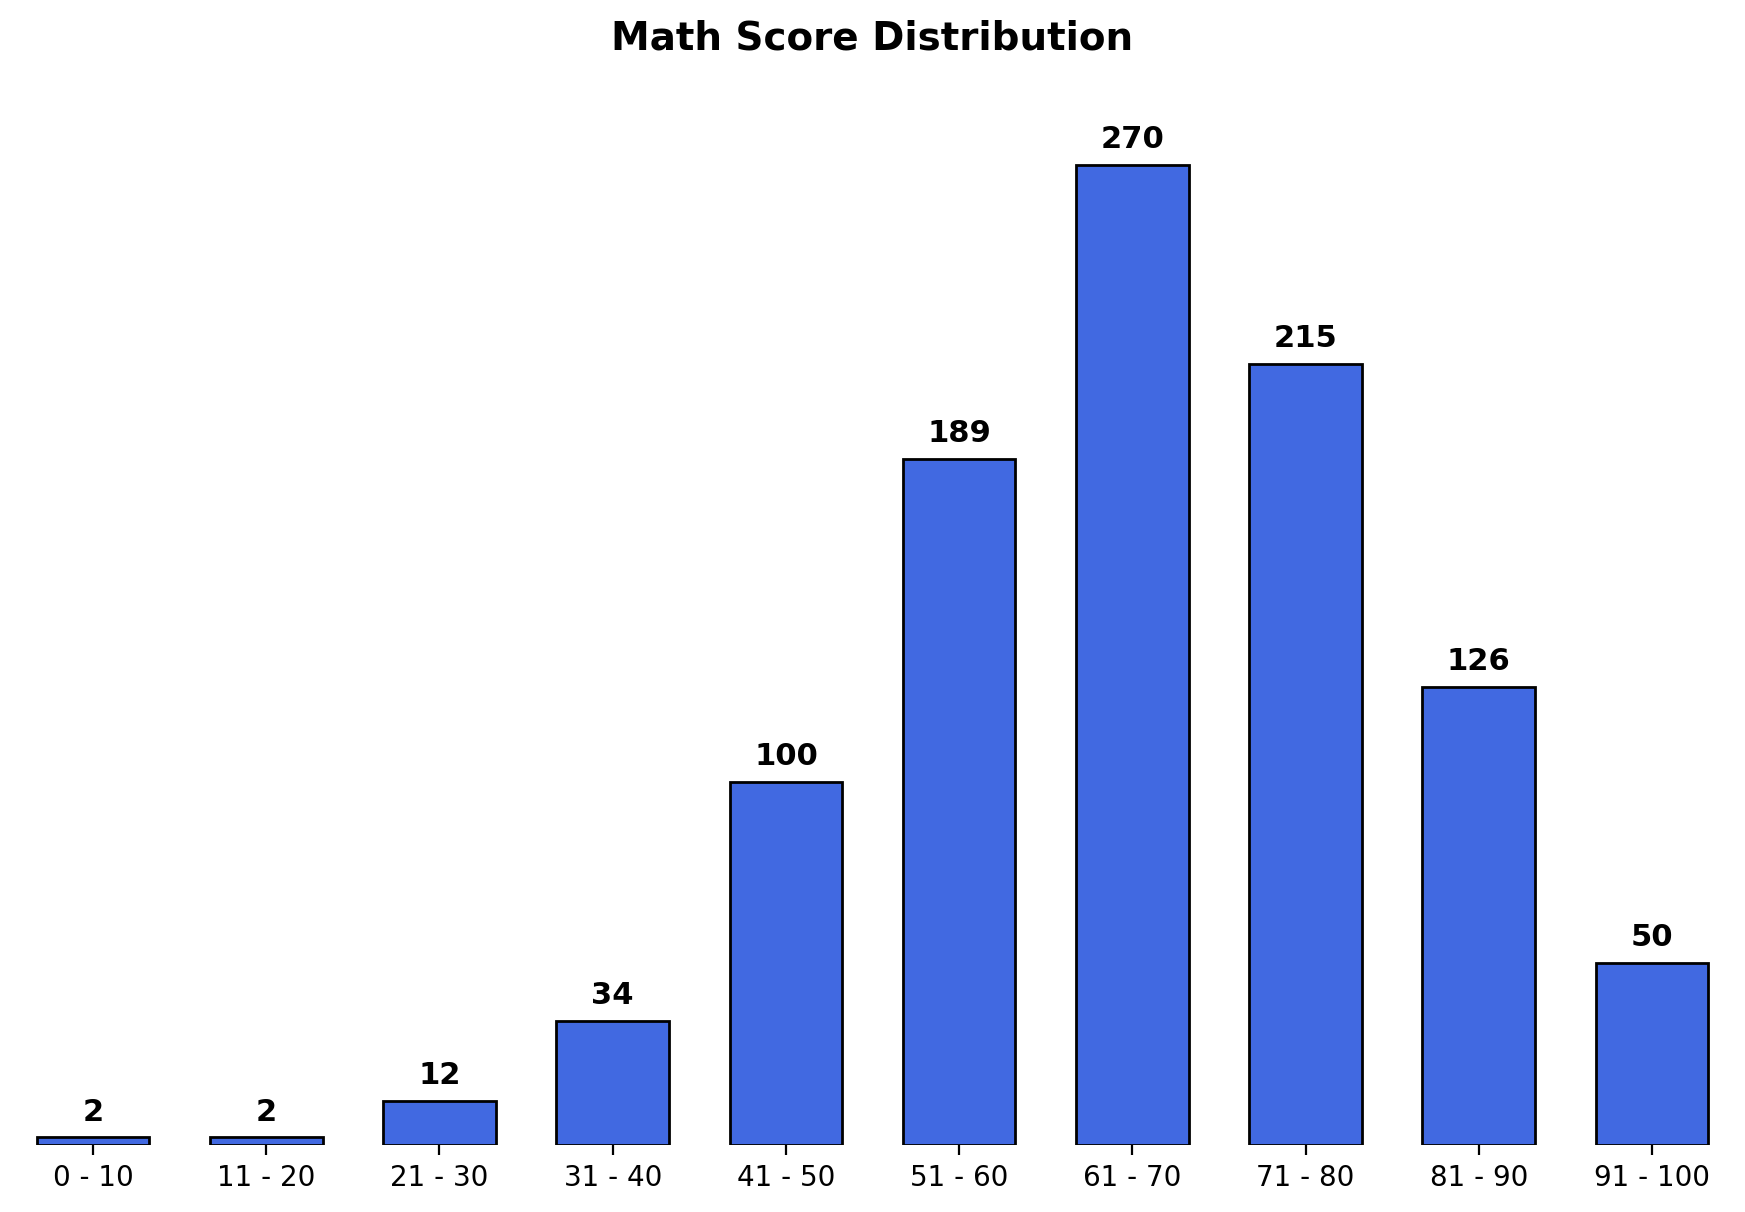

In [34]:
math_grade = student['math-range'].value_counts().sort_index()

fig, ax = plt.subplots(1, 1, figsize=(11, 7))
ax.bar(math_grade.index, math_grade,
    width=0.65, 
    color='royalblue',
    linewidth=1,
    edgecolor='black'
    )

ax.margins(0.01, 0.1)
ax.set(frame_on=False) # spine 모두 제거

ax.set_yticks([]) # y ticks 제거
ax.set_xticks(np.arange(len(math_grade)))
ax.set_xticklabels(math_grade.index)

ax.set_title('Math Score Distribution', fontsize=14, fontweight='semibold')

for idx, val in math_grade.iteritems():
    ax.text(x=idx, y=val+3, s=val,
            va='bottom', ha='center',
            fontsize=11, fontweight='semibold'
        )

plt.show()

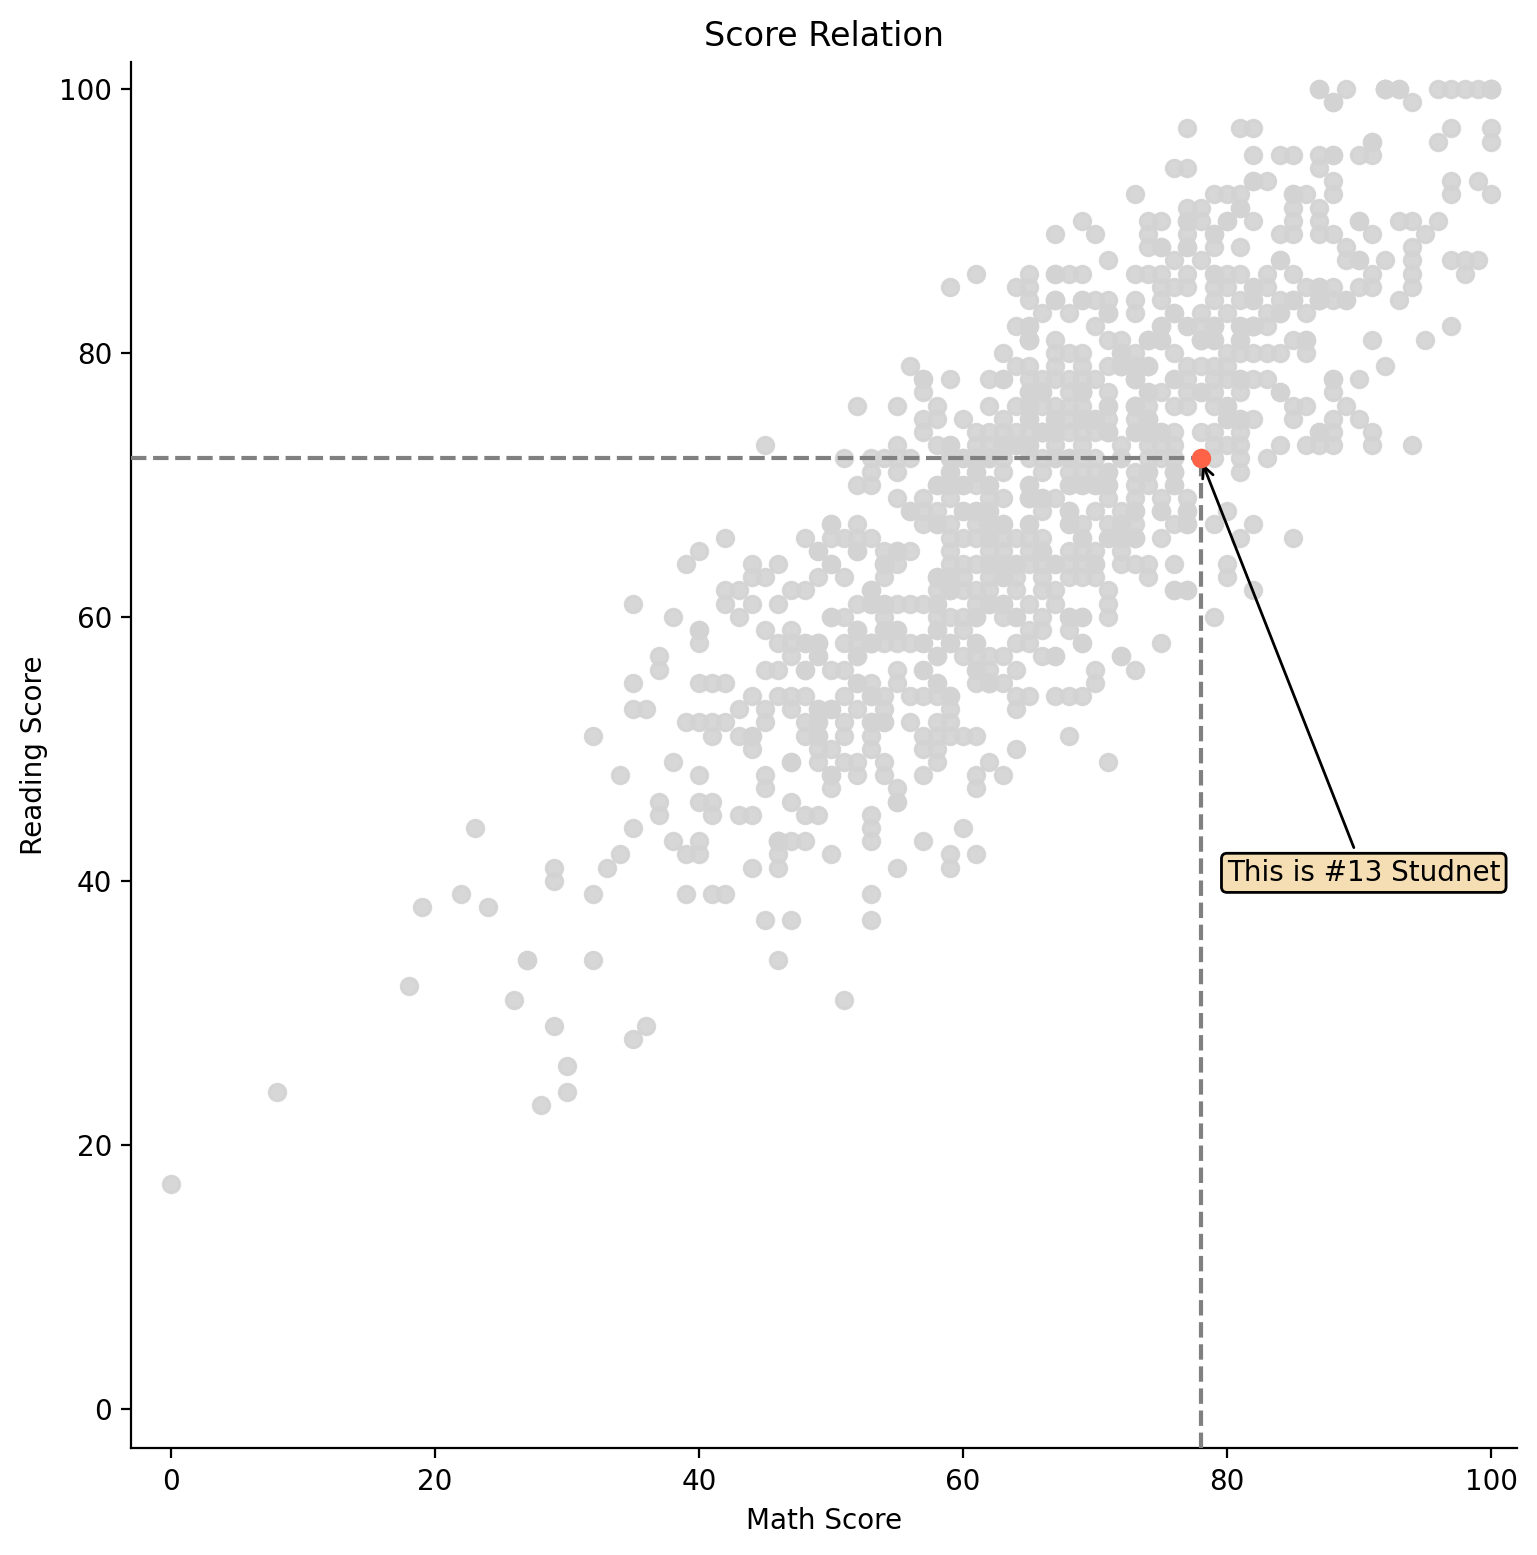

In [25]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, aspect=1)

i = 13

ax.scatter(x=student['math score'], y=student['reading score'],
        c='lightgray',
        alpha=0.9, zorder=5)
    
ax.scatter(x=student['math score'][i], y=student['reading score'][i],
        c='tomato',
        alpha=1, zorder=10)    
    
ax.set_xlim(-3, 102)
ax.set_ylim(-3, 102)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')

ax.set_title('Score Relation') 

# x축과 평행한 선
ax.plot([-3, student['math score'][i]], [student['reading score'][i]]*2,
        color='gray', linestyle='--',
        zorder=8)

# y축과 평행한 선
ax.plot([student['math score'][i]]*2, [-3, student['reading score'][i]],
    color='gray', linestyle='--',
    zorder=8)

bbox = dict(boxstyle="round", fc='wheat', pad=0.2)
arrowprops = dict(
    arrowstyle="->")

ax.annotate(text=f'This is #{i} Studnet',
            xy=(student['math score'][i], student['reading score'][i]),
            xytext=[80, 40],
            bbox=bbox,
            arrowprops=arrowprops,
            zorder=9
        )

plt.show()